In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install country_converter
import country_converter

data = pd.read_csv("ds_salaries.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
cc = country_converter.CountryConverter()
data['company_location'] = cc.convert(data['company_location'], to='name_short')
data['employee_residence'] = cc.convert(data['employee_residence'], to='name_short')

data['experience_level'] = data['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})
data['employment_type'] = data['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})
data['remote_ratio'] = data['remote_ratio'].map({
    0: 'No remote',
    50: 'Partially remote',
    100: 'Fully remote'
})
data['company_size'] = data['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

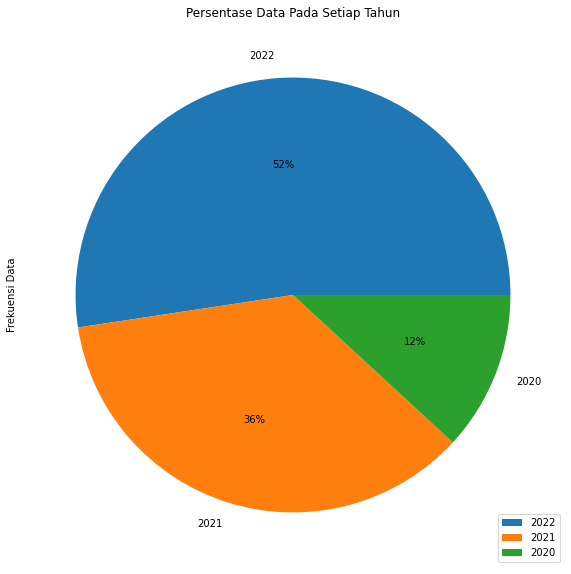

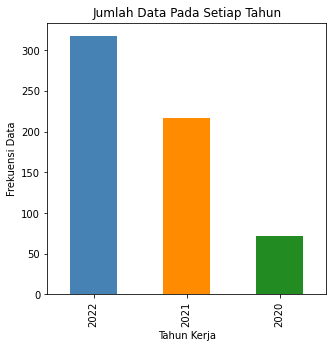

In [3]:
# work_year
data['work_year'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', legend=True, title='Persentase Data Pada Setiap Tahun', ylabel = 'Frekuensi Data')
plt.show()
data['work_year'].value_counts().plot(kind='bar', figsize=(5,5), color=['steelblue', 'darkorange', 'forestgreen'], title='Jumlah Data Pada Setiap Tahun', ylabel='Frekuensi Data', xlabel='Tahun Kerja')
plt.show()

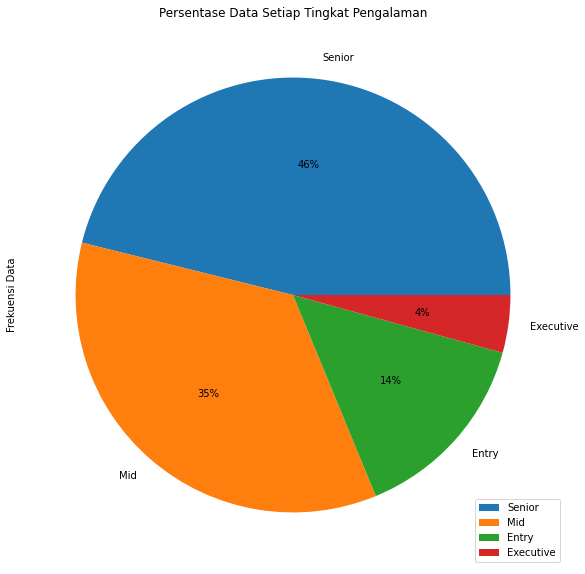

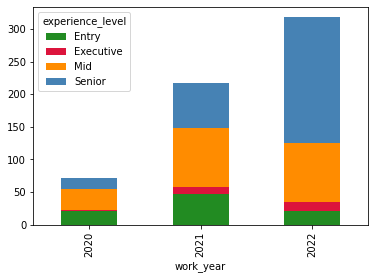

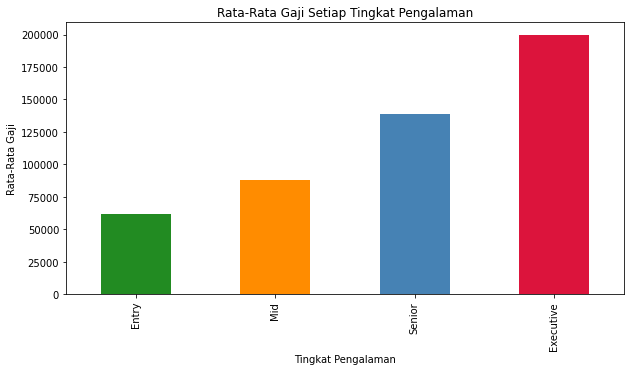

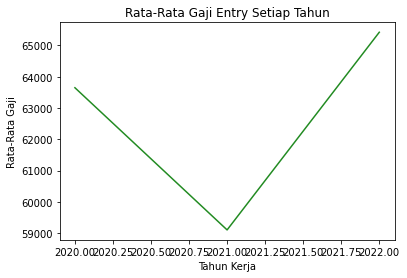

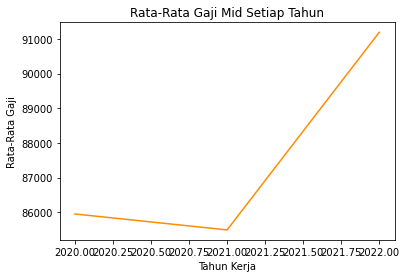

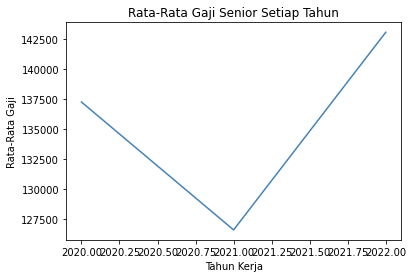

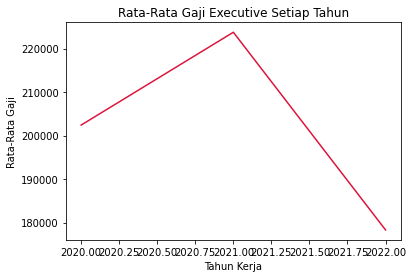

In [4]:
# experience_level
data['experience_level'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', legend=True, title='Persentase Data Setiap Tingkat Pengalaman', ylabel='Frekuensi Data')
plt.show()
data.groupby(['work_year','experience_level'])['experience_level'].size().unstack().plot(kind="bar", color=['forestgreen', 'crimson', 'darkorange', 'steelblue'], stacked=True)
plt.show()
data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(10,5), color=['forestgreen', 'darkorange', 'steelblue', 'crimson'],  title='Rata-Rata Gaji Setiap Tingkat Pengalaman', ylabel='Rata-Rata Gaji', xlabel='Tingkat Pengalaman')
plt.show()

data.loc[data['experience_level'] == 'Entry'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='forestgreen', title='Rata-Rata Gaji Entry Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['experience_level'] == 'Mid'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='darkorange', title='Rata-Rata Gaji Mid Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['experience_level'] == 'Senior'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='steelblue', title='Rata-Rata Gaji Senior Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['experience_level'] == 'Executive'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='crimson', title='Rata-Rata Gaji Executive Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()

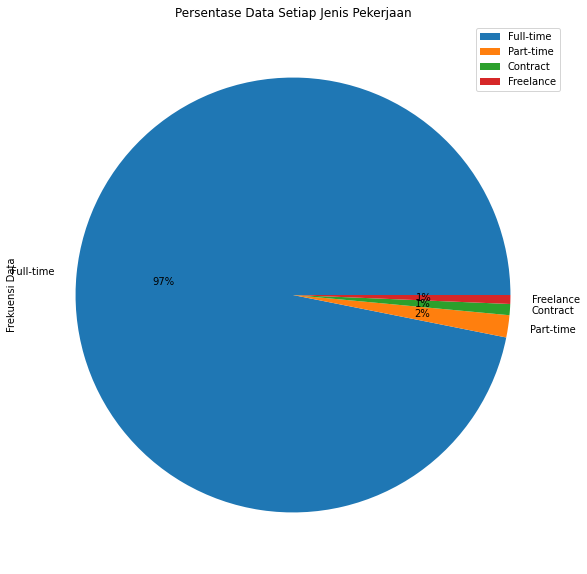

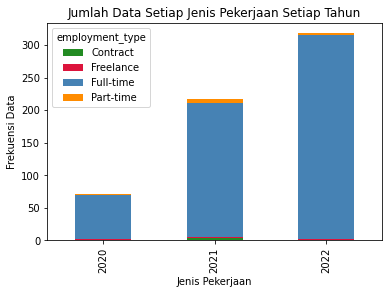

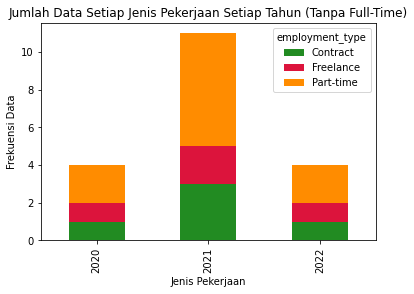

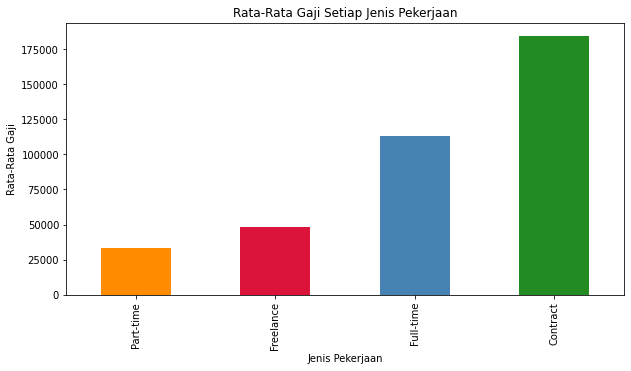

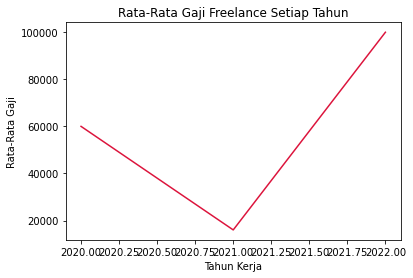

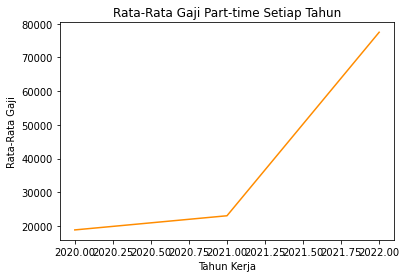

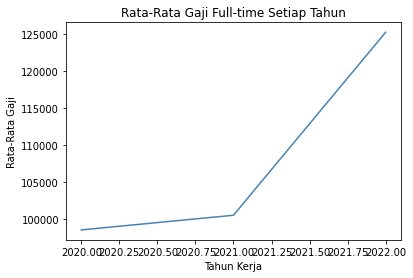

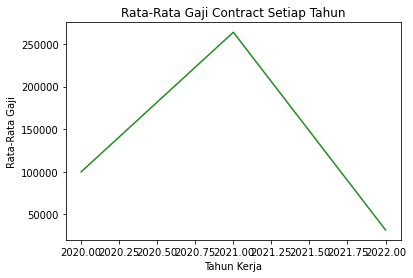

In [5]:
# employment_type
data['employment_type'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', legend=True, title='Persentase Data Setiap Jenis Pekerjaan', ylabel='Frekuensi Data')
plt.show()
data.groupby(['work_year','employment_type'])['employment_type'].size().unstack().plot(kind="bar", stacked=True, color=['forestgreen', 'crimson', 'steelblue', 'darkorange'], title='Jumlah Data Setiap Jenis Pekerjaan Setiap Tahun', ylabel='Frekuensi Data', xlabel='Jenis Pekerjaan')
plt.show()
data.loc[data['employment_type']!='Full-time'].groupby(['work_year','employment_type'])['employment_type'].size().unstack().plot(kind="bar", stacked=True, color=['forestgreen', 'crimson', 'darkorange'], title='Jumlah Data Setiap Jenis Pekerjaan Setiap Tahun (Tanpa Full-Time)', ylabel='Frekuensi Data', xlabel='Jenis Pekerjaan')
plt.show()
data.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(10,5), color=['darkorange', 'crimson', 'steelblue', 'forestgreen'], title='Rata-Rata Gaji Setiap Jenis Pekerjaan', ylabel='Rata-Rata Gaji', xlabel='Jenis Pekerjaan')
plt.show()

data.loc[data['employment_type'] == 'Freelance'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='crimson', title='Rata-Rata Gaji Freelance Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['employment_type'] == 'Part-time'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='darkorange', title='Rata-Rata Gaji Part-time Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['employment_type'] == 'Full-time'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='steelblue', title='Rata-Rata Gaji Full-time Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['employment_type'] == 'Contract'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='forestgreen', title='Rata-Rata Gaji Contract Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()

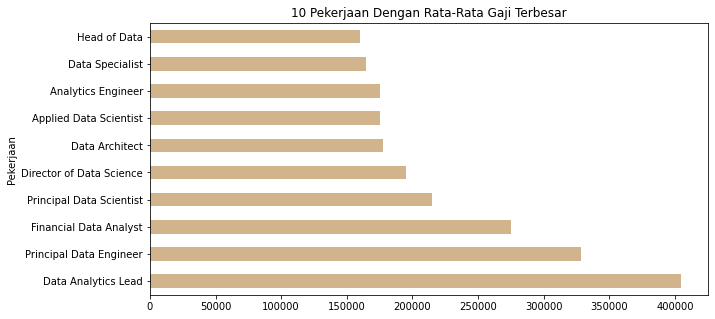

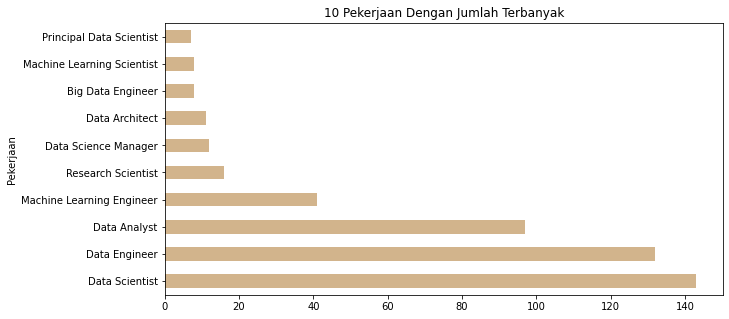

In [6]:
# job_title
data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10].plot(kind='barh', figsize=(10,5), color='tan', title='10 Pekerjaan Dengan Rata-Rata Gaji Terbesar', ylabel='Rata-Rata Gaji', xlabel='Pekerjaan')
plt.show()
data['job_title'].value_counts()[:10].plot(kind='barh', figsize=(10,5), color='tan', title='10 Pekerjaan Dengan Jumlah Terbanyak', ylabel='Frekuensi Data', xlabel='Pekerjaan')
plt.show()


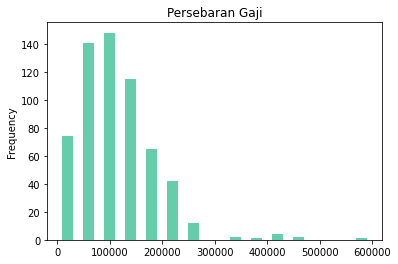

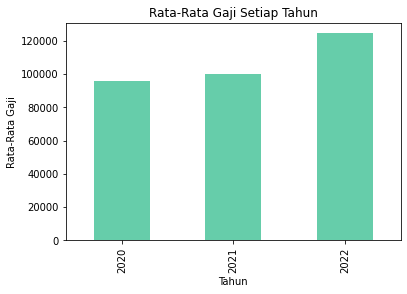

In [7]:
# salary_in_usd
data["salary_in_usd"].plot(kind="hist", bins=[i for i in range(0, 600001, 40000)], rwidth=0.5, color='mediumaquamarine', title='Persebaran Gaji', ylabel='Frekuensi Data', xlabel='Gaji')
plt.show()
data.groupby(['work_year'])['salary_in_usd'].mean().plot(kind="bar", color='mediumaquamarine', title='Rata-Rata Gaji Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun')
plt.show()

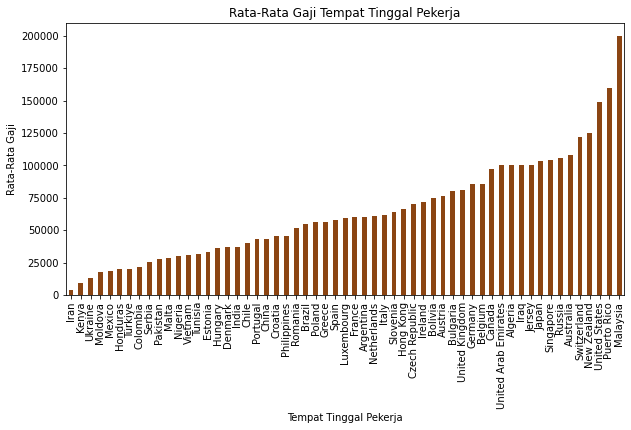

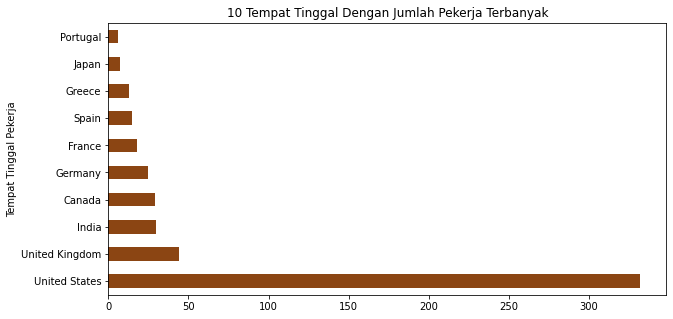

In [8]:
# employee_residence
data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=True).plot(kind='bar', figsize = (10, 5), color='saddlebrown', title='Rata-Rata Gaji Tempat Tinggal Pekerja', ylabel='Rata-Rata Gaji', xlabel='Tempat Tinggal Pekerja')
plt.show()
data['employee_residence'].value_counts()[:10].plot(kind='barh', figsize=(10,5), color='saddlebrown', title='10 Tempat Tinggal Dengan Jumlah Pekerja Terbanyak', xlabel='Tempat Tinggal Pekerja')
plt.show()

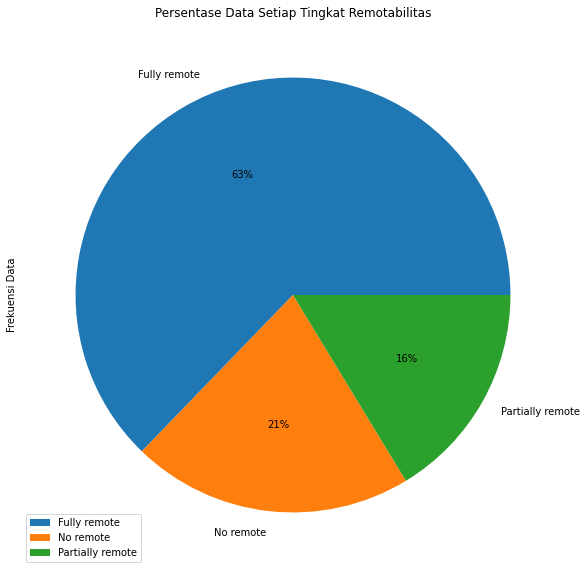

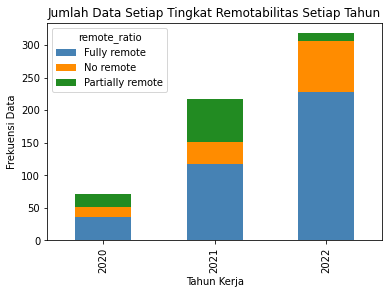

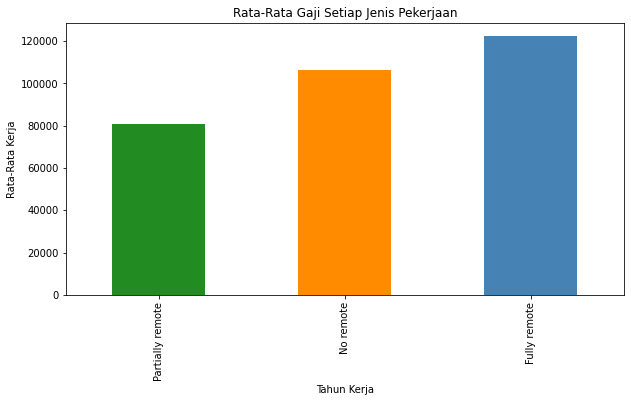

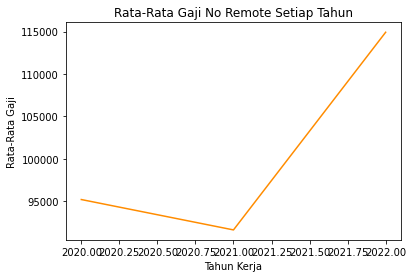

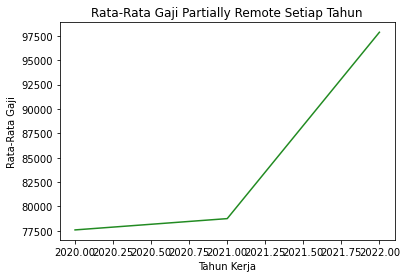

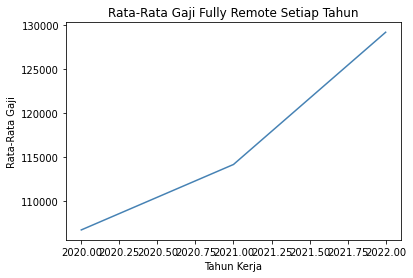

In [9]:
# remote_ratio
data['remote_ratio'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', legend=True, title='Persentase Data Setiap Tingkat Remotabilitas', ylabel='Frekuensi Data')
plt.show()
data.groupby(['work_year','remote_ratio'])['remote_ratio'].size().unstack().plot(kind="bar", stacked=True, color=['steelblue', 'darkorange', 'forestgreen'], title='Jumlah Data Setiap Tingkat Remotabilitas Setiap Tahun', ylabel='Frekuensi Data', xlabel='Tahun Kerja')
plt.show()
data.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(10,5), color=['forestgreen', 'darkorange', 'steelblue'], title='Rata-Rata Gaji Setiap Jenis Pekerjaan', ylabel='Rata-Rata Kerja', xlabel='Tahun Kerja')
plt.show()

data.loc[data['remote_ratio'] == 'No remote'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='darkorange', title='Rata-Rata Gaji No Remote Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['remote_ratio'] == 'Partially remote'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='forestgreen', title='Rata-Rata Gaji Partially Remote Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['remote_ratio'] == 'Fully remote'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='steelblue', title='Rata-Rata Gaji Fully Remote Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()

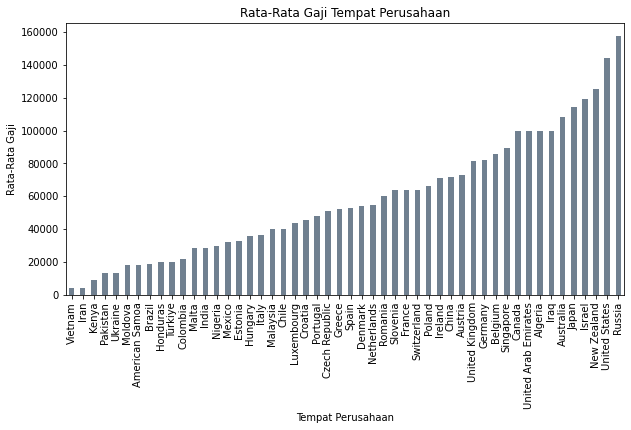

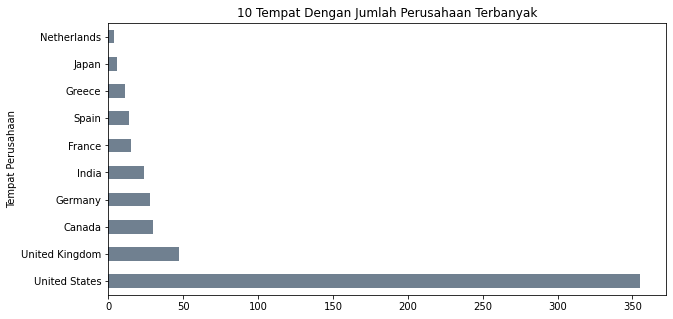

In [10]:
# company_location
data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True).plot(kind='bar', figsize = (10, 5), color='slategray', title='Rata-Rata Gaji Tempat Perusahaan', ylabel='Rata-Rata Gaji', xlabel='Tempat Perusahaan')
plt.show()
data['company_location'].value_counts()[:10].plot(kind='barh', figsize=(10,5), color='slategray', title='10 Tempat Dengan Jumlah Perusahaan Terbanyak', xlabel='Tempat Perusahaan')
plt.show()

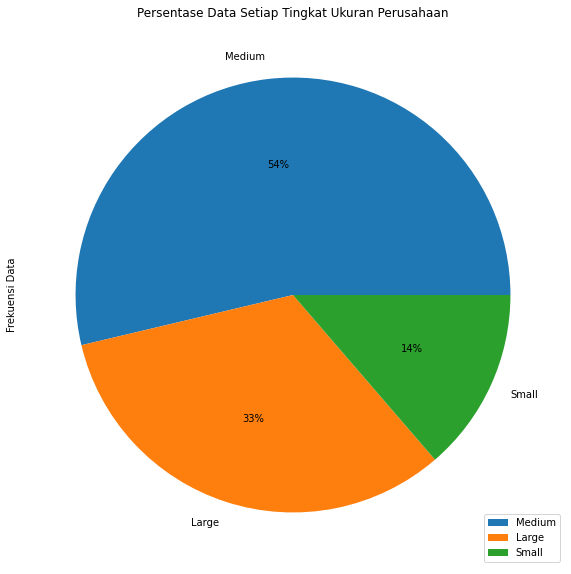

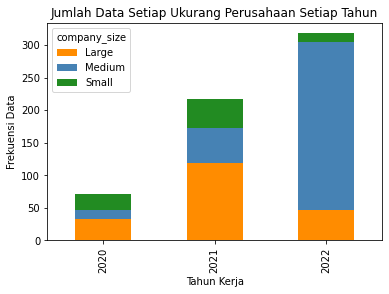

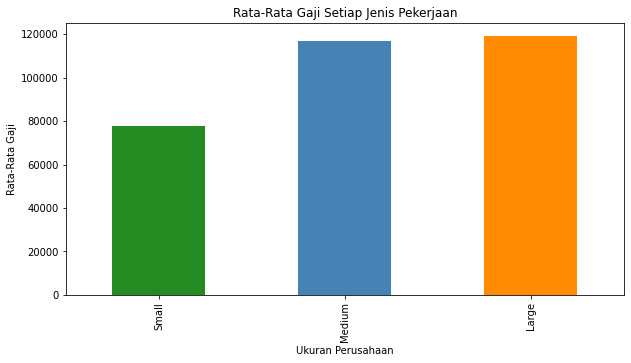

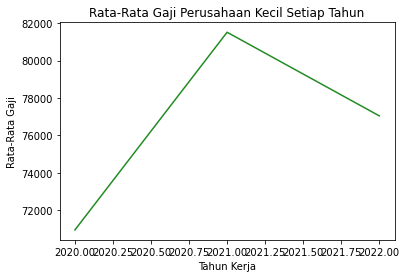

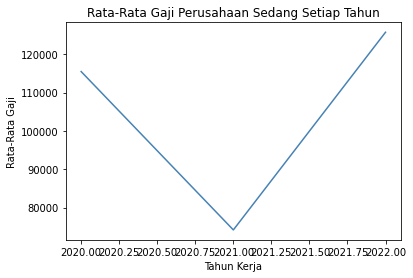

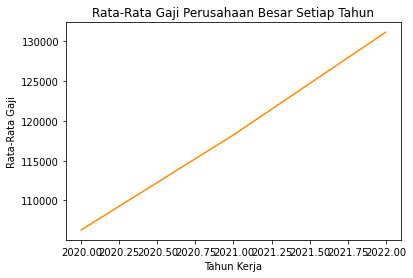

In [11]:
# company_size
data['company_size'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', legend=True, title='Persentase Data Setiap Tingkat Ukuran Perusahaan', ylabel='Frekuensi Data')
plt.show()
data.groupby(['work_year','company_size'])['company_size'].size().unstack().plot(kind="bar", stacked=True, color=['darkorange', 'steelblue', 'forestgreen'], title='Jumlah Data Setiap Ukurang Perusahaan Setiap Tahun', ylabel='Frekuensi Data', xlabel='Tahun Kerja')
plt.show()
data.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=True).plot(kind='bar', figsize=(10,5), color=['forestgreen', 'steelblue', 'darkorange'], title='Rata-Rata Gaji Setiap Jenis Pekerjaan', ylabel='Rata-Rata Gaji', xlabel='Ukuran Perusahaan')
plt.show()

data.loc[data['company_size'] == 'Small'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='forestgreen', title='Rata-Rata Gaji Perusahaan Kecil Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['company_size'] == 'Medium'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='steelblue', title='Rata-Rata Gaji Perusahaan Sedang Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()
data.loc[data['company_size'] == 'Large'].groupby('work_year')['salary_in_usd'].mean().plot(kind='line', color='darkorange', title='Rata-Rata Gaji Perusahaan Besar Setiap Tahun', ylabel='Rata-Rata Gaji', xlabel='Tahun Kerja')
plt.show()

In [12]:
data['experience_level'] = data['experience_level'].map({
    'Entry': 1,
    'Mid': 2,
    'Senior': 3,
    'Executive': 4
})
data['remote_ratio'] = data['remote_ratio'].map({
    'No remote': 0,
    'Partially remote': 50,
    'Fully remote': 100,

})
data['company_size'] = data['company_size'].map({
    'Small': 1,
    'Medium': 2,
    'Large': 3
})

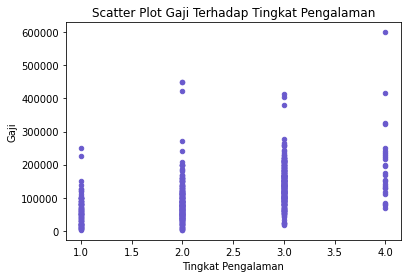

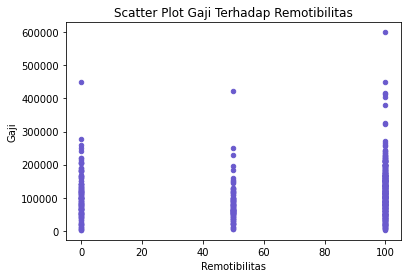

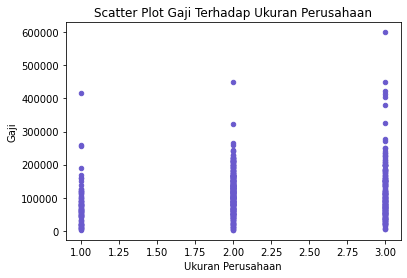

In [13]:
# Plotting Relationships
data.plot(kind="scatter", x="experience_level", y="salary_in_usd", color='slateblue', title='Scatter Plot Gaji Terhadap Tingkat Pengalaman', ylabel='Gaji', xlabel='Tingkat Pengalaman')
plt.show()
data.plot(kind="scatter", x="remote_ratio", y="salary_in_usd", color='slateblue', title='Scatter Plot Gaji Terhadap Remotibilitas', ylabel='Gaji', xlabel='Remotibilitas')
plt.show()
data.plot(kind="scatter", x="company_size", y="salary_in_usd", color='slateblue', title='Scatter Plot Gaji Terhadap Ukuran Perusahaan', ylabel='Gaji', xlabel='Ukuran Perusahaan')
plt.show()